In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
from scipy import stats

In [3]:
def score(y,lower, upper, prob):
    return (upper-lower) + (2/(1-prob))*(max(y-upper,0) + max(lower- y, 0))

In [149]:
prob_list = np.linspace(.05,.95,11)
sample_size = 25

# sample = np.random.normal(.25,1.5,sample_size)
sample = np.random.exponential(1,sample_size) - np.random.exponential(1,sample_size)
sample = sample/np.std(sample)
norm_score_list = []
u_score_list = []


for prob in prob_list:
    ci = scipy.stats.norm.interval(prob, loc=0, scale=1)
    upper_dist = np.maximum(sample-  ci[1]*np.ones(sample_size), np.zeros(sample_size))
    lower_dist = np.maximum(ci[0]*np.ones(sample_size) - sample, np.zeros(sample_size))
    norm_score = (2/(1-prob))*(upper_dist+lower_dist)+(ci[1]-ci[0])
    norm_score_list.append(np.mean(norm_score))
    
    u_ci = scipy.stats.uniform.interval(prob ,loc= -np.sqrt(3), scale = 2*np.sqrt(3) )
    u_upper_dist = np.maximum(sample-  u_ci[1]*np.ones(sample_size), np.zeros(sample_size))
    u_lower_dist = np.maximum(u_ci[0]*np.ones(sample_size) - sample, np.zeros(sample_size))
    u_score = (2/(1-prob))*(u_upper_dist+u_lower_dist)+(u_ci[1]-u_ci[0])
    u_score_list.append(np.mean(u_score))

In [150]:
pd.DataFrame({'prob':prob_list, 'norm-score':norm_score_list, 'u-score':u_score_list}).set_index('prob')

,norm-score,u-score
prob,,
0.05,1.773573,1.774490
0.14,1.929540,1.924510
0.23,2.083697,2.075728
0.32,2.241689,2.235937
0.41,2.412622,2.430237
0.50,2.610225,2.646068
0.59,2.852872,2.842655
0.68,3.074190,3.063081
0.77,3.334492,3.331094


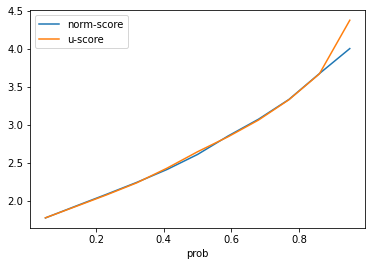

In [151]:
data_score_df = pd.DataFrame({'prob':prob_list, 'norm-score':norm_score_list, 'u-score':u_score_list}).set_index('prob')
data_score_df.plot()

In [152]:
#Confidence intervals around true normals
prob_list = np.linspace(.05,.95,11)
sample_size = 25
outcome_df = pd.DataFrame(columns = prob_list)

for i in range(0,1000):
    sample = np.random.normal(0,1,sample_size)
    norm_score_list = []


    for prob in prob_list:
        ci = scipy.stats.norm.interval(prob, loc=0, scale=1)
        upper_dist = np.maximum(sample-  ci[1]*np.ones(sample_size), np.zeros(sample_size))
        lower_dist = np.maximum(ci[0]*np.ones(sample_size) - sample, np.zeros(sample_size))
        norm_score = (2/(1-prob))*(upper_dist+lower_dist)+(ci[1]-ci[0])
        norm_score_list.append(np.mean(norm_score))
    outcome_df.loc[i]=norm_score_list

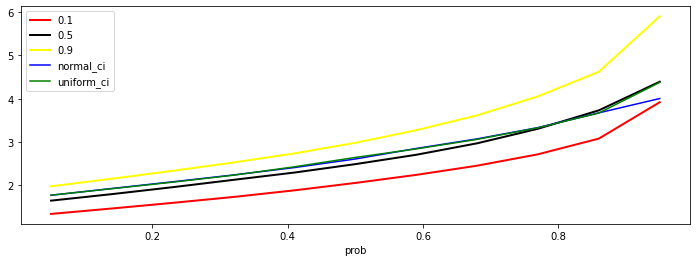

In [154]:
fig, ax = plt.subplots(figsize = (12,4))
theoretical_df = pd.pivot_table(outcome_df.quantile([.1,.5,.9]).reset_index(),columns = 'index')
theoretical_df.plot(ax = ax, linewidth =2, color = ['red','black','yellow'])
data_score_df.plot(ax = ax, color = ['blue','green'])

ax.legend([.1,.5,.9,'normal_ci','uniform_ci'])

In [160]:
theoretical_df.loc[.86]

index
0.1    3.080700
0.5    3.732842
0.9    4.623192
Name: 0.86, dtype: float64

In [161]:
data_score_df.loc[.86]

norm-score    3.674947
u-score       3.671012
Name: 0.86, dtype: float64